# A/B Testing Case Study: Homepage Experiment

---
## Libraries

In [12]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from statsmodels.stats import proportion as proptests

import matplotlib.pyplot as plt
%matplotlib inline

---
## Import data

In [13]:
data = pd.read_csv('homepage-experiment-data.csv')

In [14]:
data.describe()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
count,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000
mean,15.000000,1615.551724,260.482759,24.482759,1632.62069,294.758621,25.241379
std,8.514693,116.308268,28.338037,13.873461,113.02636,22.404807,13.762410
min,1.000000,1457.000000,223.000000,1.000000,1458.00000,256.000000,1.000000
25%,8.000000,1529.000000,240.000000,12.000000,1555.00000,279.000000,20.000000
50%,15.000000,1602.000000,254.000000,30.000000,1606.00000,290.000000,29.000000
75%,22.000000,1700.000000,276.000000,34.000000,1728.00000,300.000000,36.000000
max,29.000000,1822.000000,331.000000,42.000000,1861.00000,349.000000,44.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Day                   29 non-null     int64
 1   Control Cookies       29 non-null     int64
 2   Control Downloads     29 non-null     int64
 3   Control Licenses      29 non-null     int64
 4   Experiment Cookies    29 non-null     int64
 5   Experiment Downloads  29 non-null     int64
 6   Experiment Licenses   29 non-null     int64
dtypes: int64(7)
memory usage: 1.7 KB


In [16]:
data.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


---
## Invariant Metrics
Check if there is a statistically significant difference in the number of cookies in control- and experiment group

<AxesSubplot:>

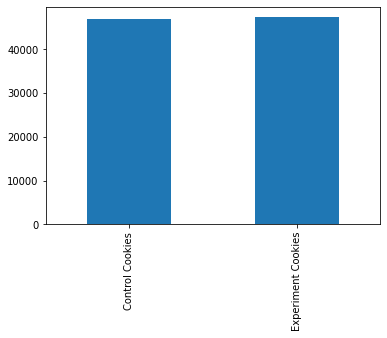

In [17]:
# First glace with visual
data[['Control Cookies', 'Experiment Cookies']].sum().plot(kind='bar')

This looks very evenly distributed. Let's do the statistical proof. Our hypothesis is that in both groups is the same amount of data recods based on the same probabbility of occurance.

In [34]:
# Getting total number of records
n_records = len(data)
# Getting the number of cookies in each group
n_control = data['Control Cookies'].sum()
n_experiment = data['Experiment Cookies'].sum()
n_total = n_control + n_experiment
print('Total records: {}'.format(n_records))
print('Control cookies: {}'.format(n_control))
print('Total cookies: {}'.format(n_total))

Total records: 29
Control cookies: 46851
Total cookies: 94197


Still - looks pretty close. Computing z-score and p-value

In [35]:
p_null = 0.5
sd = np.sqrt(p_null * (1 - p_null) * n_total) # Standard deviation
z = ((n_control + 0.5) - p_null * n_total) / sd # Z-score calculation; I added a continuity correction of 0.5

# This is a two-tailed test (*2); we calculate the invariant metric with the cumulative distribution function
print('Z-value: {}'.format(z))
print('Invariant metric: {}'.format(2 * stats.norm.cdf(z)))

Z-value: -1.6095646049678511
Invariant metric: 0.10749294050130412


With an invariant metric of 0.107 (p-value) the difference is statistically not significant. We can work with the data samples.

---
## Evaluation Metrics
The evaluation matrics are download rate and license purchase rate. A statistic will provide answers about the differences.

Starting with download rate:

In [37]:
# number of observation in control group
n_control = data['Control Cookies'].sum()
print("Number of observation in Control group: ", n_control)

# number of downloads in control group
n_control_downloads = data['Control Downloads'].sum()
# proportion of downloads in control group
p_control_downloads = n_control_downloads / n_control
print('p1 : ', p_control_downloads, "\n")

# number of observation in experiment group
n_experiment = data['Experiment Cookies'].sum()
print("Number of observation in Experiment group: ", n_experiment)

# number of downloads in experiment group
n_experiment_downloads = data['Experiment Downloads'].sum()
# proportion of downloads in experiment group
p_experiment_downloads = n_experiment_downloads / n_experiment
print('p2 : ', p_experiment_downloads, "\n")

# p = p1 + p2
p_total = (n_control_downloads + n_experiment_downloads) / (n_control + n_experiment)

# Compute standard error 
se_p = np.sqrt(p_total * (1 - p_total) * (1 / n_control + 1 / n_experiment))

# compute z score
z = (p_experiment_downloads - p_control_downloads) / se_p

print('z score: ', z)
print('p value: ', 1 - stats.norm.cdf(z))

Number of observation in Control group:  46851
p1 :  0.16123455209067042 

Number of observation in Experiment group:  47346
p2 :  0.180543234908968 

z score:  7.870833726066236
p value:  1.7763568394002505e-15


License purchase rate:

In [38]:
# number of observation in control group (restricted for 21 days)
n_control_21 = data.query('Day < 22')['Control Cookies'].sum()
print("Number of observation in Control group: ", n_control_21)

# number of purchases in control group
n_control_licenses = data['Control Licenses'].sum()
# proportion of purchases in control group
p_control_licenses = n_control_licenses / n_control_21 
print('p1 : ', p_control_licenses, "\n")

# number of observation in experiment group (restricted for 21 days)
n_experiment_21 = data.query('Day < 22')['Experiment Cookies'].sum()
print("Number of observation in Experiment group: ", n_experiment_21)

# number of purchases in experiment group
n_experiment_licenses = data['Experiment Licenses'].sum()
# proportion of purchases in experiment group
p_experiment_licenses = n_experiment_licenses / n_experiment_21
print('p2 : ', p_experiment_licenses, "\n")

# p = p1 + p2
p_total = (n_control_licenses + n_experiment_licenses) / (n_control_21 + n_experiment_21)

# Compute standard error
se_p = np.sqrt(p_total * (1 - p_total) * (1 / n_control_21 + 1 / n_experiment_21))

# compute z score
z = (p_experiment_licenses - p_control_licenses) / se_p

print('z score: ', z)
print('p value: ', 1 - stats.norm.cdf(z))

Number of observation in Control group:  33758
p1 :  0.021032051661828307 

Number of observation in Experiment group:  34338
p2 :  0.021317490826489604 

z score:  0.2586750111658684
p value:  0.3979430008399871
